# Deep Learning

An example of deep learning using the iris dataset from `scikit-learn`. The example is taken from kaggle:

https://www.kaggle.com/akashsri99/deep-learning-iris-dataset-keras/notebook

In [ ]:
import os

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix

from keras.utils import to_categorical

## Get Iris Data

In [ ]:
iris_data = datasets.load_iris()
dataset = pd.read_csv('Iris.csv')

dataset

## Define the Network

Define a network with four layers.

The activation defines how we get the output of each node. The $\tanh$ function ranges from $[-1,1]$ and is convenient for choosing between classes.

The `softmax` function takes a vector of $K$ real numbers and normalizes it into a probability distribution consisting of $K$ probabilities.

The `Adam` optimizer is used to iteratively adapt the network weights. (Remember that we are attempting to minimize a loss function, which is essentially a minimization problem.) `Adam` has become a standard optimizer in deep learning because, for typical problems, it tends to converge much more quickly than other optimizers like steepest descent.

In [8]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


## Define Training and Validation Set

Split the data into pieces for training and validation.

In [ ]:
#Splitting the data into training and test test
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

## Train the Network

Optimize the network weights. Then test how well the network predicts the actual categories.

The network trains in "epochs." At the end of each epoch, the node weights are normalized in a batch (a.k.a. *batch normalization*). The number of epochs is a tunable parameter.

In [9]:
#fitting the model and predicting 
model.fit(X_train, y_train, epochs=100)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
120/120 [==============================] - 0s 3ms/step - loss: 1.0667 - acc: 0.4167
Epoch 2/100
120/120 [==============================] - 0s 93us/step - loss: 0.6692 - acc: 0.6917
Epoch 3/100
120/120 [==============================] - 0s 92us/step - loss: 0.4962 - acc: 0.8000
Epoch 4/100
120/120 [==============================] - 0s 107us/step - loss: 0.4022 - acc: 0.8167
Epoch 5/100
120/120 [==============================] - 0s 87us/step - loss: 0.3278 - acc: 0.8750
Epoch 6/100
120/120 [==============================] - 0s 85us/step - loss: 0.2317 - acc: 0.9083
Epoch 7/100
120/120 [==============================] - 0s 94us/step - loss: 0.3652 - acc: 0.8250
Epoch 8/100
120/120 [==============================] - 0s 108us/step - loss: 0.2846 - acc: 0.8833
Epoch 9/100
120/120 [==============================] - 0s 95us/step - loss: 0.2311 - acc: 0.8917
Epoch 10/100
120/120 [==============================] - 0s 96us/step - loss: 0.1582 - acc: 0.9583
Epoch 11/100
120/120 [======

120/120 [==============================] - 0s 114us/step - loss: 0.0743 - acc: 0.9667
Epoch 85/100
120/120 [==============================] - 0s 73us/step - loss: 0.1445 - acc: 0.9500
Epoch 86/100
120/120 [==============================] - 0s 117us/step - loss: 0.1170 - acc: 0.9583
Epoch 87/100
120/120 [==============================] - 0s 108us/step - loss: 0.0864 - acc: 0.9750
Epoch 88/100
120/120 [==============================] - 0s 99us/step - loss: 0.1423 - acc: 0.9500
Epoch 89/100
120/120 [==============================] - 0s 136us/step - loss: 0.0960 - acc: 0.9667
Epoch 90/100
120/120 [==============================] - 0s 77us/step - loss: 0.0988 - acc: 0.9583
Epoch 91/100
120/120 [==============================] - 0s 70us/step - loss: 0.0922 - acc: 0.9500
Epoch 92/100
120/120 [==============================] - 0s 86us/step - loss: 0.0901 - acc: 0.9583
Epoch 93/100
120/120 [==============================] - 0s 88us/step - loss: 0.0804 - acc: 0.9750
Epoch 94/100
120/120 [=======

## Confusion Matrix

Output how well we've done by comparing the categories from the test data with the known catagories.

In [10]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


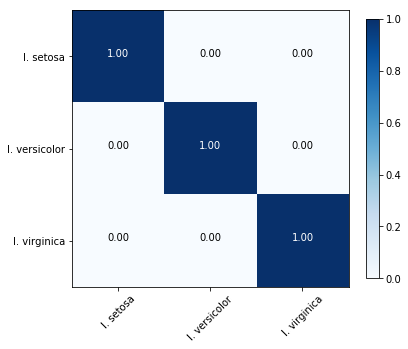

In [11]:
normalize = True

cm = confusion_matrix(y_test_class,y_pred_class)

if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, ax = plt.subplots(1,1, figsize=(6,6))
img = ax.imshow(cm,
                interpolation='nearest',
                cmap='Blues')

tick_marks = np.arange(len(iris_data.target_names))
tick_names = [' '.join(['I.', x]) for x in iris_data.target_names]
ax.set(#aspect='equal',
       xticks=tick_marks,
       xticklabels=tick_names,
       yticks=tick_marks,
       yticklabels=tick_names)
fig.colorbar(img, shrink=0.675)
plt.xticks(rotation=45)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
fig.tight_layout()